## 데이터 시각화

- pandas, matplotlib, seaborn 등 다양한 라이브러리 활용
- 데이터를 시각적으로 표현하여 패턴, 이상치를 쉽게 파악
- 라이브러리 별 특징
  - pandas : 빠른 탐색, 간단한 시각화 처리
  - matplotlib : 자유도가 높고, 세밀한 그래프 제작 가능
  - seaborn : 깔끔하고 직관적인 기본 시각화 스타이로가 다양한 테마 적용

In [2]:
import pandas as pd

# date_range(start, periods, freq) : 균등한 간격의 날짜시간 인덱스 생성 함수
# - start : 시작일
# - periods : 기간의 개수
# - freq : 날짜시간 간격의 주기. 기본 'D' : 하루

data = {
  "date" : pd.date_range(start='2025-11-15', periods=10, freq='D'),
  "temperature" : [18, 19, 10, 7, 9, 15, 13, 15, 16, 17],
  "humidity": [60, 62, 55, 57, 60, 61, 59, 58, 60, 99]
}

df = pd.DataFrame(data)
df = df.set_index('date')
df


,temperature,humidity
date,,
2025-11-15,18,60
2025-11-16,19,62
2025-11-17,10,55
2025-11-18,7,57
2025-11-19,9,60
2025-11-20,15,61
2025-11-21,13,59
2025-11-22,15,58
2025-11-23,16,60


<Axes: title={'center': 'Daily Temperature'}, xlabel='date', ylabel='Temperature (℃)'>

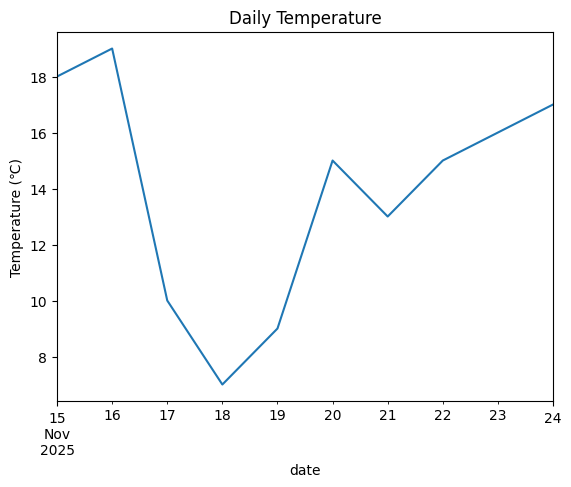

In [3]:
import matplotlib

# pandas plot
# * plot() : DataFrame/Series를 바로 시각화 해주는 함수
#     - kind : 그래프 종류. 'line', 'bar', 'box', 'pie' etc...
#     - title : 그래프 제목
#     - xlabel : x축 라벨, ylabel : y축 라벨

# 기온(temperature) 데이터를 시각화
df['temperature'].plot(title='Daily Temperature', ylabel = 'Temperature (℃)')
# ㄹ 한자 + 7 / win+.

# => matplotlib 모듈 설치
#     > pip install matplotlib


<Axes: title={'center': 'Temperature with 3-day'}, xlabel='date', ylabel='T(℃)'>

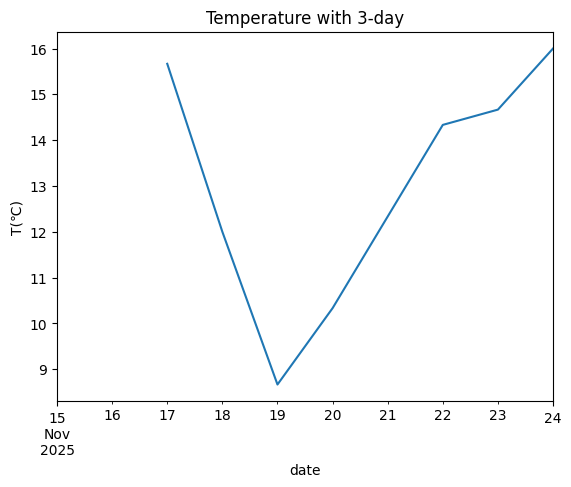

In [4]:
# 3일 이동평균 시각화
df['temperature'].rolling(3).mean().plot(title='Temperature with 3-day', ylabel="T(℃)")

<Axes: title={'center': 'Temperature & Humidity'}, xlabel='date'>

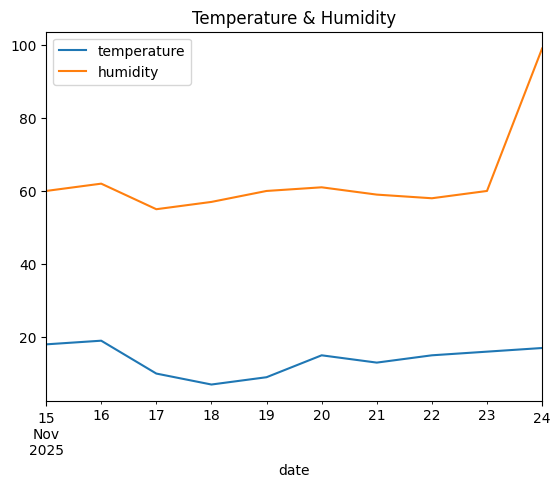

In [5]:
# 여러 컬럼 시각화
df[['temperature', 'humidity']].plot(title='Temperature & Humidity')

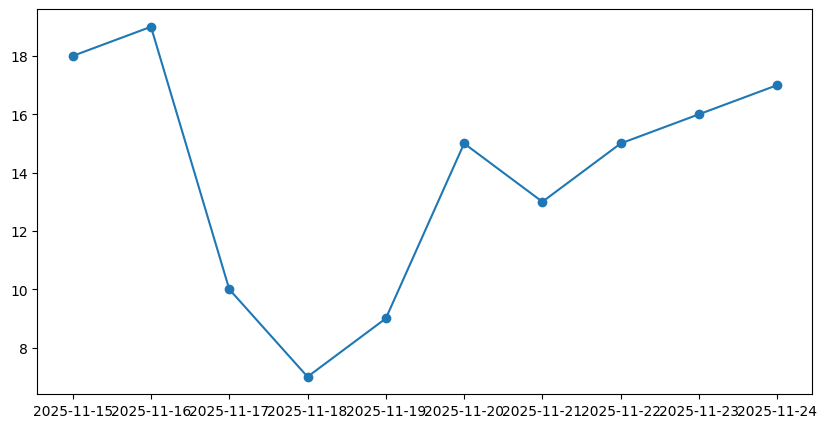

In [7]:
# matplotlib
# - 자유도가 높고, 세밀한 커스터마이징 가능
# - 코드가 길고, 처음 다루기에는 복잡할 수 있음

# import
import matplotlib.pyplot as plt

# Figure : 도화지
plt.figure(figsize=(10, 5))   # 가로 10, 세로 5 크기 지정하여 figure 생성

plt.plot(df.index,                # x축 데이터 (날짜)
         df['temperature'],       # y축 데이터 (온도)
         marker='o',              # 데이터 포인트 표시 모양 ('o' -원)
         label='Temperature'      # 범례
         )

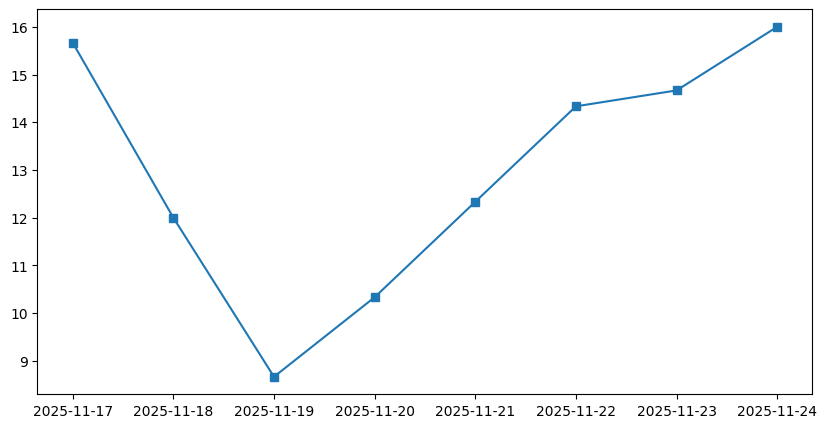

In [10]:
# 3일 이동평균 그래프 표시
plt.figure(figsize=(10, 5))

plt.plot(df.index,
         df['temperature'].rolling(3).mean(),
         marker='s',          # 포인트 모양 : '사각형'
         label='3-day MA'
         )

AttributeError: module 'matplotlib.pyplot' has no attribute 'grind'

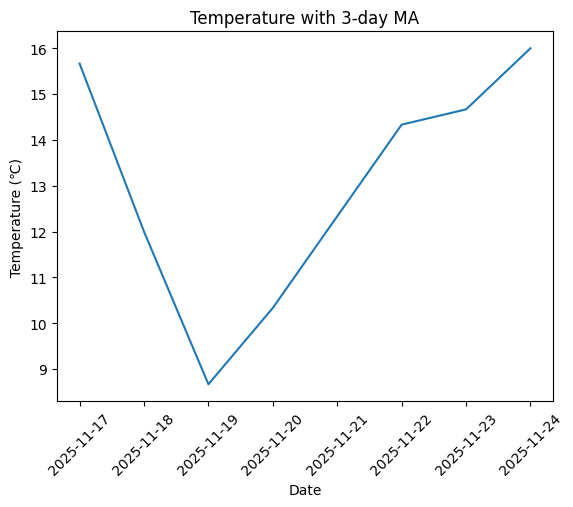

In [11]:
# 그래프 옵션 각각 설정하기

plt.plot(df.index, df['temperature'].rolling(3).mean())   # x축, y축
plt.title('Temperature with 3-day MA')            # 그래프 제목
plt.xlabel('Date')                        # x축 라벨
plt.ylabel('Temperature (℃)')             # y축 라벨
plt.xticks(rotation=45)                   # x축 눈금 라벨 회전
plt.grind(True)                           # 격자 표시
plt.show()    # 그래프 표시

(array([20407., 20408., 20409., 20410., 20411., 20412., 20413., 20414.,
        20415., 20416.]),
 [Text(20407.0, 0, '2025-11-15'),
  Text(20408.0, 0, '2025-11-16'),
  Text(20409.0, 0, '2025-11-17'),
  Text(20410.0, 0, '2025-11-18'),
  Text(20411.0, 0, '2025-11-19'),
  Text(20412.0, 0, '2025-11-20'),
  Text(20413.0, 0, '2025-11-21'),
  Text(20414.0, 0, '2025-11-22'),
  Text(20415.0, 0, '2025-11-23'),
  Text(20416.0, 0, '2025-11-24')])

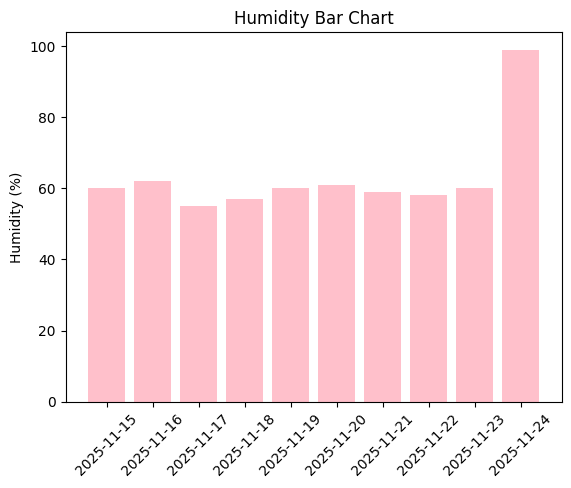

In [15]:
# 막대 그래프

plt.bar(
  df.index,            # x축 데이터 (날짜)
  df['humidity'],      # y축 데이터(습도)
  color='pink'        # 막대 색상
)

plt.title('Humidity Bar Chart')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Temperature Line Chart')

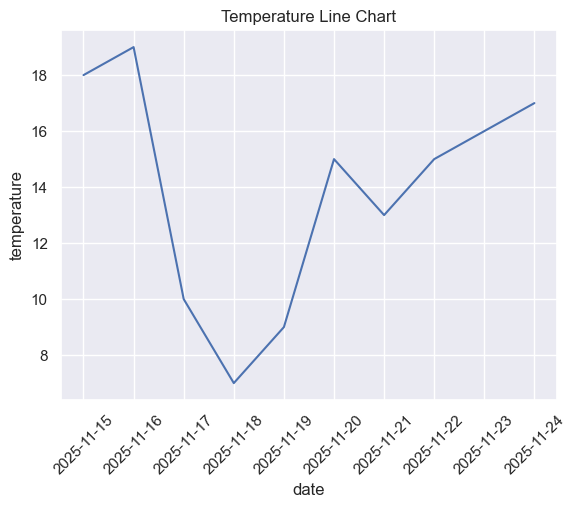

In [22]:
# seaborn
# - 통계적 시각화에 최저과되어 있느 라이브러리
# - 스타일 자동 적용 가능(테마)
# - 단, 세밀한 설정(커스터마이징)은 matplotlib을 활용함

import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style='darkgrid')
# 선 그래프
sns.lineplot(x=df.index, y=df['temperature'])
plt.xticks(rotation=45)
plt.title('Temperature Line Chart')

<Axes: xlabel='Subject', ylabel='Score'>

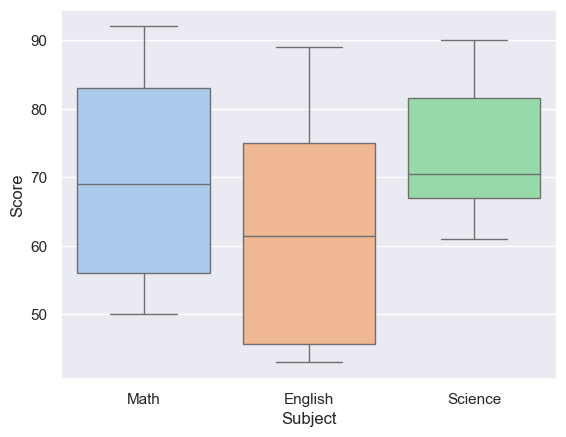

In [27]:
'''
      * 박스플롯(Boxplot)
        : 데이터의 분포와 이상치를 한눈에 보여주는 그래프
        : 중앙값, 사분위수, 최소/최대값, 이상치를 시각적으로 확인
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_box = pd.DataFrame(
  {
    "Math" : np.random.randint(50, 100, 20).tolist(),
    "English" : np.random.randint(40, 90, 20).tolist(),
    "Science" : np.random.randint(55, 95, 20).tolist()
  }
)

# wide 형식의 데이터를 long 형식으로 변환 => melt()
# - 각 컬럼의 값이 행 단이로 쌓이고, 변수 이름과 값이 각각 컬럼으로 만들어짐
df_box = df_box.melt(var_name='Subject', value_name='Score')

# melt(var_name, value_name)
# - var_name : 새로 만들어질 '변수 이름' 컬럼명
# - value_name : 새로 만들어질 '값' 컬럼명

sns.boxplot(data=df_box, x='Subject', y='Score', palette='pastel', hue='Subject')

<Axes: >

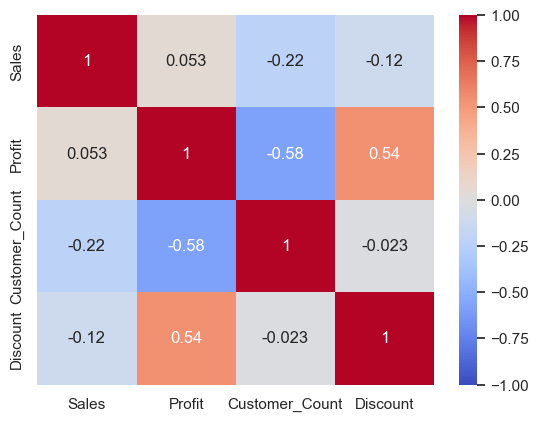

In [30]:
'''
    * 히트맵 (Heatmap)
      : 값의 크기를 색상으로 표현하는 2차원 그래프
      : 상관관계를 시각화
'''

df_heat = pd.DataFrame({
  "Sales":np.random.randint(100, 500, 15),
  "Profit":np.random.randint(20, 150, 15),
  "Customer_Count":np.random.randint(20, 200, 15),
  "Discount" : np.random.randint(0, 50, 15)
})

# * 컬럼 간 상관계수 계산 => corr()
#   - 상관계수 : 두 변수 사이의 관계를 숫자로 나타낸 것
#   - 값 범위 : -1 ~ 1 (1: 양의 상관, -1: 음의 상관, 0: 상관 없음)

df_heat = df_heat.corr()
# df_heat

sns.heatmap(data=df_heat, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
